<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminar #2: Exponential smoothing models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center"> Home Work 1 </h1>

## Answer questions

1) ** How do adaptive properties of SES change when smoothing parametr $\alpha$ converges to 1?**

2) ** What will be the optimal value of smoothing parameter of trend $\beta$ in Hold model for 1) time series with slowly  changing trend; 2) stochastic changing trend (look <a href="http://stochastictrend.blogspot.am/">here </a>)? **

3) **Proof the equivalency of correction error form and smoothing form for unobserved component of TS in  Thei-Wage model (period of seasonality equals $p$):**

  $$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} )=l_{t-1} + b_{t-1} + \alpha e_t;$$
  $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} = b_{t-1} + \alpha\beta e_t;$$
  $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} = s_{t-p} + \gamma(1-\alpha)e_t.$$


4) **Find the correction error form for unobserved component of TS in ES with additive damped trend:**

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$

**Unobserved components are (in smoothing form): **

$$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$
$$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$

## Answer 1

The prediction graph just repeat original with some shift

## Answer 2

For answer to that question lets use the data which has both slowly changing and stochastic changing intervals:

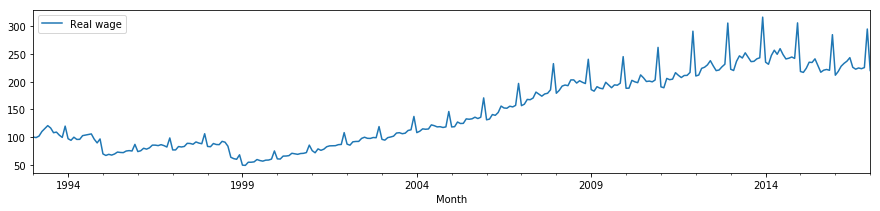

In [1]:
import pandas as pd
import math
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

%matplotlib inline


ts = pd.read_csv('monthly_wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
ts.plot(figsize=(15,3))


In [5]:
def qualityMAPE(x,y):
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def HoltExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    b=np.NaN
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr]
            if math.isnan(b):
                b= 0
            
            l_old=l
            l = alpha*x[cntr]+(1-alpha)*(l+b) # recurrent smoothing of level 
            b=beta*(l-l_old)+(1-beta)*b
            
        FORECAST[cntr+h] = l+b
    return FORECAST

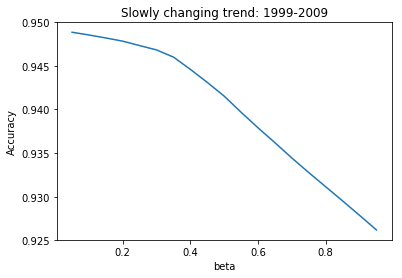

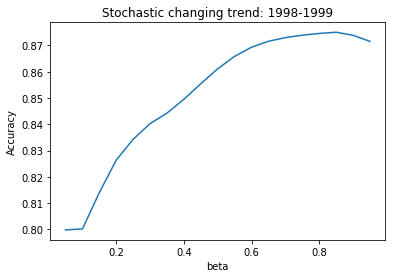

In [36]:
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

h_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

beta=np.linspace(0,1,21)[1:-1]
score=[]
for bet in beta:
    
    h_frc_ts['Real wage'] = HoltExponentialSmoothing(ts['Real wage'], h, {'alpha':0.45, 'beta':bet, 'seasonality_period':12})
    score.append(1.0-qualityMAPE(ts['Real wage'].loc['1999-09-01':'2009-01-01'],h_frc_ts['Real wage'].loc['1999-09-01':'2009-01-01'])[0])
    
plt.plot(beta,score)
plt.xlabel("beta")
plt.ylabel("Accuracy")
plt.title("Slowly changing trend: 1999-2009")
plt.show()

score=[]
for bet in beta:
    
    h_frc_ts['Real wage'] = HoltExponentialSmoothing(ts['Real wage'], h, {'alpha':0.2, 'beta':bet, 'seasonality_period':12})
    score.append(1.0-qualityMAPE(ts['Real wage'].loc['1998-05-01':'1999-01-01'],h_frc_ts['Real wage'].loc['1998-05-01':'1999-01-01'])[0])
    
plt.plot(beta,score)
plt.xlabel("beta")
plt.ylabel("Accuracy")
plt.title("Stochastic changing trend: 1998-1999")
plt.show()

##### So

1. for series with slow changing trend we need to use small beta (sometimes 0), because Simple ES is enough to follow the trend.
2. for stochastic changing trend we need to use big betas, because Simple ES is very inert to follow the trend

## Answer 3
3.1
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} )=l_{t-1} + b_{t-1} + \alpha e_t;$$
proof
$$\alpha (y_t - s_{t-p}) -\alpha (l_{t-1} + b_{t-1} )=\alpha e_t;$$
$$y_t - s_{t-p} -l_{t-1} - b_{t-1} =e_t;$$
$$y_t - \hat{y}_{t/t-1} =e_t;$$

3.2
$$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} = b_{t-1} + \alpha\beta e_t;$$
proof
$$ \beta (l_{t} - l_{t-1} ) -\beta b_{t-1} = \alpha\beta e_t;$$
$$ l_{t} - l_{t-1} - b_{t-1} = \alpha e_t;\quad\text{     see 3.1}$$

3.3
$$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} = s_{t-p} + \gamma(1-\alpha)e_t.$$
proof
$$ \gamma (y_t-l_t) -\gamma s_{t-p} = \gamma(1-\alpha)e_t.$$
$$ y_t-l_t -s_{t-p} = (1-\alpha)e_t.$$
$$ y_t-l_t -s_{t-p}- l_{t-1} - b_{t-1} + l_{t-1} + b_{t-1} = (1-\alpha)e_t.$$
$$ (y_t -s_{t-p}- l_{t-1} - b_{t-1})-l_t + l_{t-1} + b_{t-1} = (1-\alpha)e_t.$$
$$ -l_t + l_{t-1} + b_{t-1}  = -\alpha e_t.\quad\text{     see 3.1}$$


## Answer 4

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$
$$\hat{y}_{t+1|t} = l_t + \phi b_t.$$
$$e_t=y_t-\hat{y}_t=y_t-l_{t-1}-\phi b_{t-1}$$
$$y_t=e_t+l_{t-1}+\phi b_{t-1}$$

$$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$
$$ l_{t}       = \alpha (e_t+l_{t-1}+\phi b_{t-1}) + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),\quad\text{see two rows above}$$
$$ l_{t}       = \alpha e_t + l_{t-1} +\phi b_{t-1},$$

$$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$
$$ b_t         = \beta \left(\alpha e_t +\phi b_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.\quad\text{see two rows above}$$
$$ b_t         = \beta \alpha e_t + \phi b_{t-1}.$$